In [1]:
# API Homework

# Stock and Digital Currency(DC) Evaluation

#Time Value Analysis via Monte Carlo Simulation (Comparative)

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline




In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Collect Crypto Prices Using the requests Library

# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

In [5]:
#calling the value of btc

my_btc


1.2

In [6]:
#calling the value of eth

my_eth 

5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
import requests

import json

In [9]:
#Use the requests library to fetch the current price in Canadian dollars (CAD) of bitcoin (BTC) and ethereum (ETH) 


# Getting current BTC price
btc_response_data = requests.get(btc_url).json()

# Current BTC price in Canadian Dollars
btc_cad = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]


# Getting current ETH price
eth_response_data = requests.get(eth_url).json()

# Current ETH price in Canadian Dollars
eth_cad = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]


print(f"Current BTC closing price in CAD: ${btc_cad:0.2f}")

print(f"Current ETH closing price in CAD: ${eth_cad:0.2f}")


Current BTC closing price in CAD: $52925.10
Current ETH closing price in CAD: $4019.36


In [10]:
#assigning value CMP(Current Market Price) * UH (Units Held)

my_btc_value = 53593.23*1.2

my_eth_value = 4078.48*5.3

In [11]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $64311.88
The current value of your 5.3 ETH is $21615.94


In [12]:
#Total Value of Digitial Currency holdings

total_value_dc_holdings = my_btc_value + my_eth_value
print(f"Total value of Digital Currency Holdings: $ {my_btc_value + my_eth_value}") 

Total value of Digital Currency Holdings: $ 85927.82


In [13]:
# Second Part

In [14]:
#Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [15]:
# Set current amount of shares
my_agg = 200
my_spy = 50

 # Set current amount of shares data
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [16]:
# Load .env environment variables
load_dotenv()

True

In [17]:
import requests

import json

In [18]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [19]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [20]:
 # Set Alpaca API key and secret
alpaca_akey = os.getenv("alpaca_akey")
alpaca_skey = os.getenv("alpaca_skey")


# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_akey)}")
print(f"Alpaca Secret Key type: {type(alpaca_skey)}")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_akey,
    alpaca_skey,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [21]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"


In [22]:
 # Get current price data for AGG and SPY
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame

# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2022-04-08 04:00:00+00:00  104.82  105.01  104.615  104.73  6501822   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.63  445.94   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-08 04:00:00+00:00  447.57  79148376      573491  448.250805

In [23]:
# Pick AGG and SPY close prices

# Get the current closing prices from the DataFrame

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.73
Current SPY closing price: $447.57


In [24]:
# Compute the current value in dollars of the stock portfolio
agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
total_portfolio_value = agg_value + spy_value

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")
print(f"The current total value of your(the) stock portfolio is ${agg_value + spy_value}")


The current value of the 200 AGG shares is $20946.00
The current value of the 50 SPY shares is $22378.50
The current total value of your(the) stock portfolio is $43324.5


In [25]:
# Set monthly household income (in the USD)
monthly_income = 12000

# Create savings DataFrame
investments_data = {"AMOUNT": [total_value_dc_holdings, total_portfolio_value]}
investments = ["total_value_dc_holdings $", "total_stock_portfolio_value $"]

# Create Savings DataFrame with `investments` as index
df_savings = pd.DataFrame(investments_data, index=investments)

# Display Savings data
df_savings

,AMOUNT
total_value_dc_holdings $,85927.82
total_stock_portfolio_value $,43324.50


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='AMOUNT'>

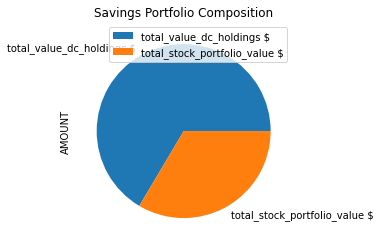

In [26]:
# Plot savings pie chart
df_savings.plot.pie(y="AMOUNT", title="Savings Portfolio Composition")

In [27]:
#Establishing an Emergency Fund

In [28]:
# Set ideal emergency fund

emergency_fund = 12000 * 3
emergency_fund


36000

In [29]:
# Calculate total amount of savings (Combined Total of DC and stock holdings)

Total_savings = total_value_dc_holdings + total_portfolio_value
Total_savings


129252.32

In [30]:
# Validate saving health
# Savings Health is A OKAY.  Current investments are suffcient to cover over 9 months of living expenses.

In [31]:
#Part 2 - Retirement Planning

In [32]:
 # Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [33]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [34]:
# Monte Carlo Simulation


In [35]:
 # Set Alpaca API key and secret
alpaca_akey = os.getenv("alpaca_akey")
alpaca_skey = os.getenv("alpaca_skey")


# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_akey)}")
print(f"Alpaca Secret Key type: {type(alpaca_skey)}")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_akey,
    alpaca_skey,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [37]:
 # Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data for AGG & SPY
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-28 04:00:00+00:00,452.05,455.910,450.060,455.84,68744767,624225,453.296491,SPY
2022-03-29 04:00:00+00:00,460.07,462.070,457.180,461.53,86682895,738526,459.632992,SPY
2022-03-30 04:00:00+00:00,460.29,461.195,456.465,458.79,79668682,659199,459.158702,SPY
2022-03-31 04:00:00+00:00,457.92,458.760,451.160,452.11,118607132,751169,455.444107,SPY
2022-04-01 04:00:00+00:00,453.30,453.460,449.140,452.92,88676014,624745,451.850848,SPY


In [38]:
# Reorganize the DataFrame
 #Concat the data

# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-04-03 04:00:00+00:00       15992  108.605513  235.79  236.03  233.910   
2017-04-04 04:00:00+00:00        8325  108.591265  235.00  235.58  234.555   
2017-04-05 04:00:00+00:00       11167  108.599103  236.26  237.39  234.540   
2017-04-06 04:00:00+00:00        7746  108.588276  234.96  236.04  234.425   
2017-04-07 04:00:00+00:00        8534  108.645684  235.18  236.00  234.640   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-03 04:00:00+00:00  235.33   85546486      278486  235.194832  
2017-04-04 04:00:00+00:00  235.48   56466195      192579  235.237449  
2017-04-05 04:00:00+00:00  234.78  108800604      363080  235.933657  
2017-04-06 04:00:00+00:00  235.44   69135757      244996  235.287745  
2017-04-07 04:00:00+00:00  235.20   74412311      235941  235.290964

In [40]:
 # Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_Thirty_Year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [41]:
# Print the simulation input data
MC_Thirty_Year.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.89  108.420  108.44  1783599   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-03 04:00:00+00:00       15992  108.605513          NaN  235.79   
2017-04-04 04:00:00+00:00        8325  108.591265    -0.000920  235.00   
2017-04-05 04:00:00+00:00       11167  108.599103     0.001105  236.26   
2017-04-06 04:00:00+00:00        7746  108.588276    -0.000092  234.96   
2017-04-07 04:00:00+00:00        8534  108.645684    -0.002208  235.18   

                                                                           \
                             high      low   close     volume trade_count   
timestamp                                                                   
2017-04-03 04:00:00+00:00  236.03  233.910  235.33   85546486      278486   
2017-04-04 04:00:00+00:00  235.58  234.555  235.48   56466195      192579   
2017-04-05 04:00:00+00:00  237.39  234.540  234.78  108800604      363080   
2017-04-06 04:00:00+00:00  236.04  234.425  235.44   69135757      244996   
2017-04-07 04:00:00+00:00  236.00  234.640  235.20   74412311      235941   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-03 04:00:00+00:00  235.194832          NaN  
2017-04-04 04:00:00+00:00  235.237449     0.000637  
2017-04-05 04:00:00+00:00  235.933657    -0.002973  
2017-04-06 04:00:00+00:00  235.287745     0.002811  
2017-04-07 04:00:00+00:00  235.290964    -0.001019

In [42]:
 # Running a Monte Carlo simulation to forecast thirty years cumulative returns
MC_Thirty_Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tylerscott/April 5 2022 API/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005505,1.005005,1.005377,0.992169,1.000517,1.008622,1.003229,1.005148,0.997665,1.007205,...,0.991641,1.006784,1.004924,1.007869,0.991954,1.002070,0.997474,1.004707,1.001014,1.005268
2,1.008025,1.010788,0.996282,0.993707,1.008378,1.009454,1.006522,1.000448,0.993179,1.011133,...,0.996094,1.004774,1.002807,1.010365,0.998109,0.995770,1.011314,1.003280,0.999739,1.002082
3,0.998404,1.007558,0.998278,0.990857,1.016484,1.004867,1.015225,1.002626,0.988446,1.001502,...,0.997347,1.004058,1.008442,1.009201,0.995434,0.994252,1.013928,1.019826,1.000515,0.995744
4,1.000839,1.006181,1.000396,0.989338,1.013996,1.003426,1.020236,0.991862,0.991279,1.002275,...,0.991030,1.002335,1.010830,1.013299,0.984884,0.990547,1.003716,1.019444,0.992546,0.988428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.812316,5.624033,7.284436,3.970444,5.161651,4.700747,11.483828,2.517355,5.538515,6.305320,...,3.086732,3.433084,7.440028,4.793148,6.257742,8.093898,9.101212,14.761690,3.685358,5.819630
7557,2.828516,5.606041,7.290385,3.969063,5.160009,4.679573,11.316885,2.516646,5.541580,6.303746,...,3.099881,3.463583,7.450863,4.789451,6.185012,8.107103,9.176997,14.768883,3.715991,5.835830
7558,2.814833,5.631067,7.307894,3.952136,5.143566,4.699710,11.383784,2.526448,5.533276,6.320585,...,3.090494,3.468552,7.473090,4.822309,6.212855,8.175469,9.218918,14.807310,3.698575,5.804145
7559,2.808229,5.635272,7.292148,3.925544,5.160615,4.698770,11.366049,2.512939,5.464837,6.334726,...,3.063574,3.463440,7.520300,4.814440,6.229380,8.157352,9.147599,14.932439,3.731642,5.813606


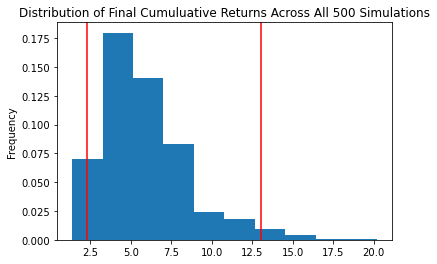

In [43]:
#Plot probability distribution and confidence intervals
dist_plot = MC_Thirty_Year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_Thirty_Year_dist_plot.png',bbox_inches='tight')

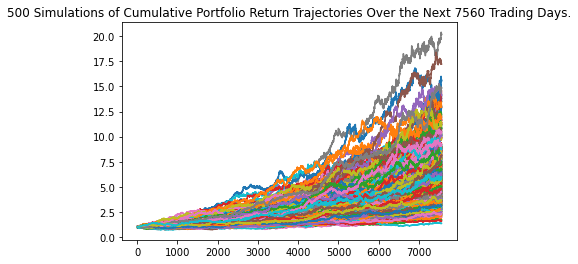

In [44]:
 # Plot simulation outcomes
line_plot = MC_Thirty_Year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_Thirty_Year_sim_plot.png", bbox_inches="tight")

In [45]:
# Retirement Analysis Section

In [46]:
# Summary statistics from the Monte Carlo simulation results
tbl = MC_Thirty_Year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.834745
std               2.721704
min               1.367222
25%               3.891040
50%               5.350755
75%               7.207380
max              20.185768
95% CI Lower      2.280074
95% CI Upper     13.028384
Name: 7560, dtype: float64


In [52]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 
#$20,000 initial investment.

 # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $45601.47 and $260567.68


In [53]:
 # Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $45601.47 and $390851.52


In [49]:
#END of ANALYSIS